Author: Michael Stoll\
6/5/2024\
\
As before, I am referencing the work of others fairly often as I work through this.\
The motivation behind the code below is to evaluate the performance of different preprocessing methods to improve the quality of a data set, the end goal being to have a data set with stronger correlations than the raw data provided.

In [34]:
import sklearn
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

data = pd.read_csv("Global_Landslide_Catalog_Export_20240605.csv", sep=",")

For this assignment, I've chosen a dataset regarding news reports of landslides from NASA's public archives. This dataset has many columns, such as publisher, date, or country of origin, though these were not helpful for what I was trying to see. Instead, I focused on the trigger, size, injury count, and fatality count associated with each landslide, with the hypothesis being that there would be some correlation between the size of the landslide and the number of injuries caused, the number of injuries and the number of fatalites, etc. I wasn't looking for a perfect data set; in fact, for this assignment I was explicitly looking for a real-world data set that could be cleaned up and used for better correlations than the raw data.

I've had to manipulate the csv into numerical format to get it to work properly. An unedited copy will also be included in the repo, as well as the set I'm actually working with, which is the same set but minus the irrelevant data points (country of origin, news story publisher, etc.)\
The data points that remain are Trigger (cause of the landslide), Size (self-explanatory), Injuries (ibid), and Fatalites(ibid).
For my sanity and your readability, I'm going to list the numerical representations of the data I'm translating here:\
Trigger: unknown = 0, rain = 1, downpour = 2, monsoon = 3, continuous_1 = 4, tropical_cyclone = 5, other = 6.\
Size: unknown = 0, small = 1, medium = 2, large = 3, very_large = 4, catastrophic = 5.
\
\
Now that basic imports are done, it's time to get into the actual preprocessing. Something that I saw in Wolff's repo was a consolidated function for display purposes, which seemed like a good idea to me. So that's what this is.\
I'm focusing almost entirely on the info and the heatmap, because I feel that I can get my point across clearly by showing the correlation between the different variables, and the count of the non-null data points is going to be relevant in the future.

In [35]:
def build(cleanedData):
    df = pd.DataFrame(cleanedData)
    #df.describe()
    df.info()
    plt.show()
    sns.heatmap(df.corr(), square = True, annot= True, linewidths=.1, vmax=1, linecolor='black', cmap='Grays')
    plt.show()

Since it's always a good idea to start with a control, I'm going to go ahead and just send the baseline data through and see what happens.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trigger     11010 non-null  float64
 1   size        11024 non-null  float64
 2   fatalities  9648 non-null   float64
 3   injuries    5359 non-null   float64
dtypes: float64(4)
memory usage: 344.9 KB


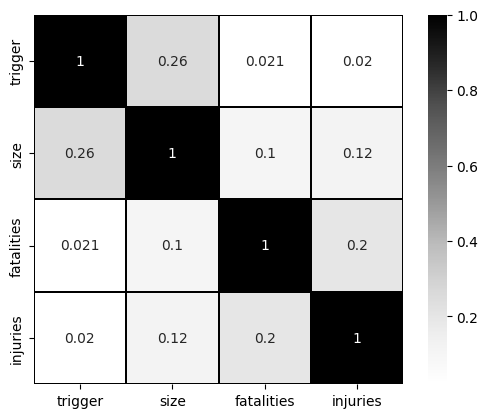

In [36]:
build(data)

As could be reasonably expected, there is no strong correlation between any of the variables, with the correlation between trigger and size being the strongest. Of course, this is raw data, and that's the whole point of this entire assignment. I have a few ideas on how I could strengthen the correlations.\
\
First of all, and not for nothing, the counts in the info window for non-null values fluctuate pretty wildly. For example, over half of the data points provided have no data point for injuries. For each one of these entries, the correlation would likely be skewed in one direction or another by the remaining data that isn't null. So, a logical next step seems to me to be to get rid of these entries and work with only entries that have data for all four entries.\
Luckily, there is a built in function that does exactly that, so my job in this step is easy.

<class 'pandas.core.frame.DataFrame'>
Index: 5325 entries, 11 to 11032
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trigger     5325 non-null   float64
 1   size        5325 non-null   float64
 2   fatalities  5325 non-null   float64
 3   injuries    5325 non-null   float64
dtypes: float64(4)
memory usage: 208.0 KB


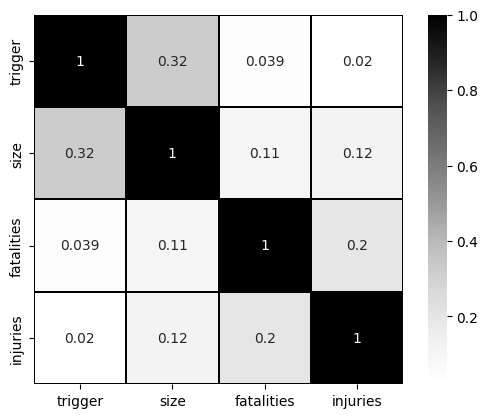

In [37]:
newData = data.dropna()

build(newData)

As you can see, all of the entries that had one or more null values has now been removed from the dataset. This, as I expected, had the effect of strengthening several of the correlations on the heatmap, which means I'm making some progress.\
However, 32% isn't that much stronger than 26%. Clearly this data still needs some work done to it to be of much use.\
This being real-world data, the next thing that stuck out to me was the prevalence of entries that didn't have reported triggers or sizes. Going into this, I don't know if that would cause the same sort of correlation skew that the previous step corrected, but I suspect that it will.

<class 'pandas.core.frame.DataFrame'>
Index: 9269 entries, 0 to 11032
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trigger     9246 non-null   float64
 1   size        9260 non-null   float64
 2   fatalities  7940 non-null   float64
 3   injuries    3761 non-null   float64
dtypes: float64(4)
memory usage: 362.1 KB


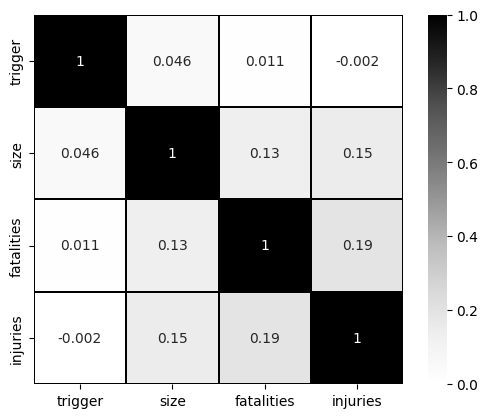

In [38]:
newerData = data.drop(data[(data['trigger'] ==0) | (data['size'] == 0)].index)

build(newerData)

Clearly, this is beginning to head in the wrong direction. Just to verify, I'm going to run it on the dataset I had left after the previous step, to see if somehow they complement each other well.

<class 'pandas.core.frame.DataFrame'>
Index: 3727 entries, 13 to 11032
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trigger     3727 non-null   float64
 1   size        3727 non-null   float64
 2   fatalities  3727 non-null   float64
 3   injuries    3727 non-null   float64
dtypes: float64(4)
memory usage: 145.6 KB


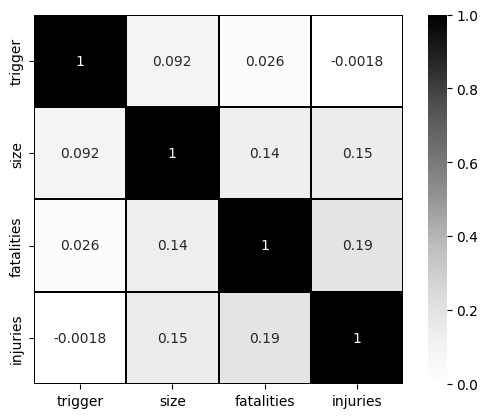

In [39]:
newerData = newData.drop(newData[(newData['trigger'] == 0) | (newData['size'] == 0)].index)

build(newerData)

Since we've confirmed that this isn't a good strategy, it's now time to scrap the idea and move on to another one.\
It seems reasonable to get rid of any obvious outliers, so that will be next on the list.\
For some reason, I'm struggling to get these display elements to work together, so I'm going to separate them into their own cells.

<Axes: >

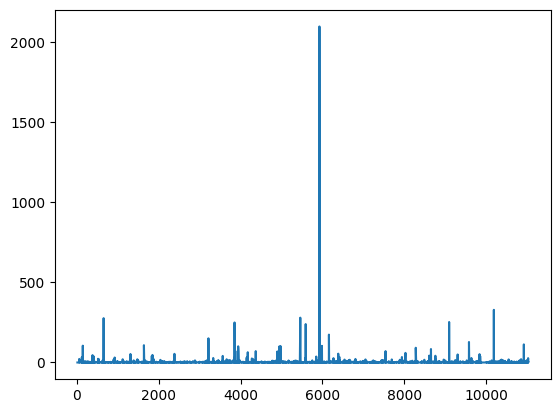

In [40]:
#newData[data.duplicated()]
newData['fatalities'].describe()
newData['fatalities'].plot()

<Axes: >

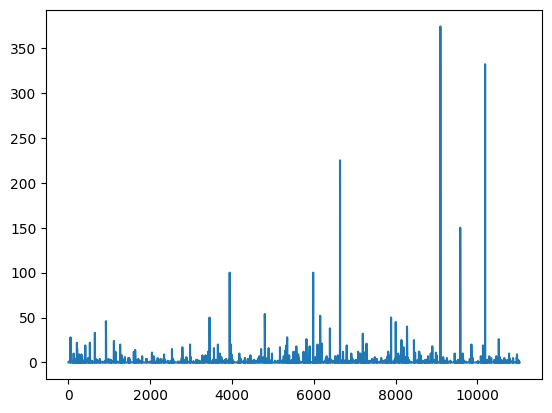

In [41]:
newData['injuries'].describe()
newData['injuries'].plot()

Clearly, there are some major outliers in this data set. I have never seen a max value that was over 1000x the mean value before now. But, this step should be pretty easy to clean up, all things considered. All we have to do is cut off the bell curve at a point that makes sense.\
After some short deliberation, I decided that staying within one standard deviation of the mean score makes sense (since, if I remember correctly, that accounts for ~96% of all data) makes sense. Since we're working with integers, I rounded to the nearest whole number, but the concept remains that I'm dropping anything that was over one standard deviation away from the mean.

<Axes: >

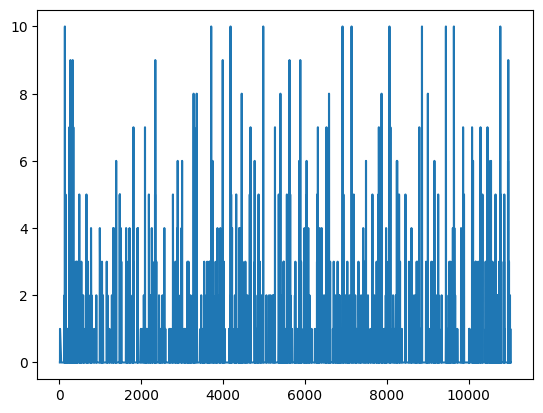

In [42]:
#newerData = newData.drop(newData[(newData['fatalities'] > 62) | (newData['injuries'] > 17)].index)
newerData = newData.drop(newData[(newData['fatalities'] > 33) | (newData['injuries'] > 10)].index)
newerData['injuries'].plot()
#newerData['injuries'].describe()

<Axes: >

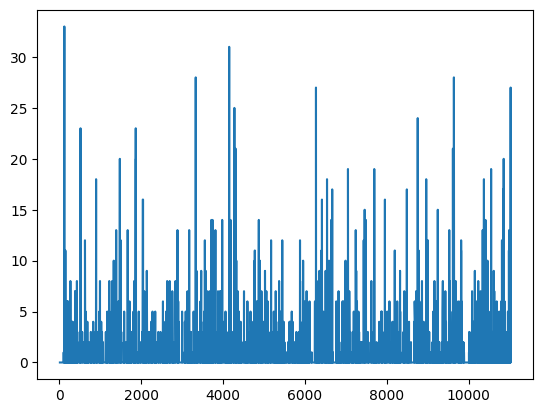

In [43]:
newerData['fatalities'].plot()
#newerData['fatalities'].describe()

These look much more usable than before. There is still some noise in the data, of course, but since we're working with real-world data there is bound to always be some. Off of this, we should be able to verify that the data is becoming cleaner by building it again and checking the results.

<class 'pandas.core.frame.DataFrame'>
Index: 5225 entries, 11 to 11032
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trigger     5225 non-null   float64
 1   size        5225 non-null   float64
 2   fatalities  5225 non-null   float64
 3   injuries    5225 non-null   float64
dtypes: float64(4)
memory usage: 204.1 KB


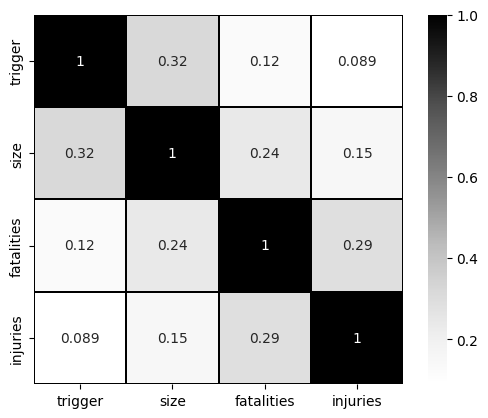

In [44]:
build(newerData)

We're back on the right track. There still isn't a correlation above 50%, which is a little disheartening, but we are well above where we were. Ultimately, that may just come down to the nature of the data and what it represents. Maybe there just isn't a regression that can accurately match trigger of landslide to number of injuries with any real accuracy.\
Regardless, it's clear that the methods I've used to clean up the data and make it more accurate have been successful.